# XGBoost
https://xgboost.readthedocs.io/en/latest/tutorials/index.html

https://www.programcreek.com/python/example/99824/xgboost.XGBClassifier

https://www.datacamp.com/community/tutorials/xgboost-in-python

https://xgboost.readthedocs.io/en/latest/tutorials/index.html

- XGBoost stands for “Extreme Gradient Boosting”, where the term “Gradient Boosting” originates from the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. 
- XGBoost decision tree ensembles

# Housing Regression
https://campus.datacamp.com/courses/extreme-gradient-boosting-with-xgboost/fine-tuning-your-xgboost-model?ex=11

In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
housing_data = pd.read_excel('Kaggle_house _price/house_data.xls')
X,y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]

In [3]:
housing_dmatrix = xgb.DMatrix(data=X,label=y)

## Untuned Model

In [4]:
untuned_params = {"objective":"reg:linear"}

In [ ]:
untuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=untuned_params, nfold=4,
                                 metrics="rmse", as_pandas=True,seed=123)

In [6]:
untuned_cv_results_rmse.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
5,153562.953125,1470.085523,174172.757812,1954.420486
6,138731.914062,1248.845910,162730.710938,2889.229530
7,129082.476562,1157.934699,156195.765625,3593.305448
8,122845.099610,1131.079535,152798.160156,4520.309356
9,117486.644532,1237.595302,150277.082031,4307.187923


In [7]:
print("Untuned rmse: {}".format(untuned_cv_results_rmse["test-rmse-mean"].tail(1)))

Untuned rmse: 9    150277.082031
Name: test-rmse-mean, dtype: float64


## Tuned Model

In [8]:
tuned_params = {"objective":"reg:linear", "colsample_bytree":0.3,
               "learning_rate":0.1, "max_depth":5}

In [ ]:
tuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=tuned_params, nfold=4,
                                metrics="rmse", as_pandas=True,seed=123,
                                num_boost_round=200)

In [10]:
print("Tuned rmse: {}".format(tuned_cv_results_rmse["test-rmse-mean"].tail(1)))

Tuned rmse: 199    137991.195312
Name: test-rmse-mean, dtype: float64


## Common tree tunable parameters
- **learning rate**: learning rate/eta
- **gamma**: min loss reduction to create new tree split
- **lambda**:L2 reg on leaf weights
- **alpha**:L1 reg on leaf weights
- **max_depth**: max depth per tree
- **subsample**: % samples used per tree
- **colsample_bytree**: % features used per tree

## Linear tunable parameters
- **lambda**:L2 reg on leaf weights
- **alpha**:L1 reg on leaf weights
- **lambda_bias**: L2 reg term on bias

## Grid Search

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
gbm_param_grid = {'learning_rate':[0.01,0.1,0.5,0.9],
                  'n_estimators':[200],
                  'subsample':[0.3,0.5,0.9]}

In [13]:
gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm, 
                        param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error',
                        cv=4,
                        verbose=1).fit(X,y)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.2min finished


In [14]:
print("Best parameters found:", grid_mse.best_params_)

Best parameters found: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.9}


In [15]:
print("Lowest RMSE found:", np.sqrt(np.abs(grid_mse.best_score_)))

Lowest RMSE found: 148320.0431300591


# Heart Disease Classification

In [16]:
heartD = pd.read_csv('Kaggle_Heart_Disease/heartD_Nor.csv')
heartD.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_indeced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target
0,0.592593,male,non-anginal pain,0.75,-0.110236,greater than 120mg/dl,normal,-0.092308,No,0.9375,upsloping,0,normal,1
1,-1.333333,male,atypical angina,0.00,0.157480,lower than 120mg/dl,ST-T wave abnormality,1.046154,No,1.6875,upsloping,0,fixed defect,1
2,-1.037037,female,typical angina,0.00,-0.566929,lower than 120mg/dl,normal,0.584615,No,0.3750,downsloping,0,fixed defect,1
3,0.074074,male,typical angina,-0.50,-0.062992,lower than 120mg/dl,ST-T wave abnormality,0.769231,No,0.0000,downsloping,0,fixed defect,1
4,0.148148,female,Unknown,-0.50,1.795276,lower than 120mg/dl,ST-T wave abnormality,0.307692,Yes,-0.1250,downsloping,0,fixed defect,1


In [17]:
heartD = pd.get_dummies(heartD,drop_first=True)
heartD.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_indeced_angina_Yes,ST_slope_flat,ST_slope_upsloping,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknown
0,0.592593,0.75,-0.110236,-0.092308,0.9375,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

X_train, X_test, y_train, y_test = train_test_split(heartD.drop('target',1), heartD['target'], 
                                                    test_size = 0.2, random_state = 42)

In [19]:
import xgboost as xgb
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import precision_score,recall_score,f1_score,jaccard_similarity_score,log_loss
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, average_precision_score

from sklearn.model_selection import cross_val_predict,cross_val_score

## Model

[0]	validation_0-auc:0.899462	validation_1-auc:0.839978
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[100]	validation_0-auc:0.998689	validation_1-auc:0.885776
[200]	validation_0-auc:1	validation_1-auc:0.884698
Stopping. Best iteration:
[18]	validation_0-auc:0.969132	validation_1-auc:0.904095

Test set AUC: 0.9040948275862069
Test set accuracy: 0.8524590163934426


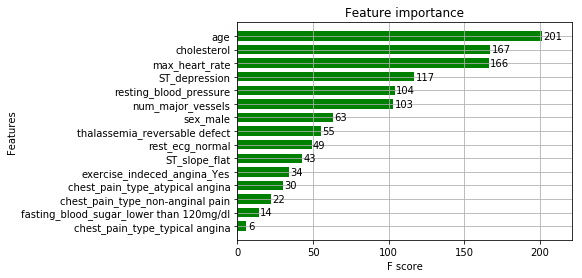

In [20]:
eval_set = [[X_train, y_train],[X_test, y_test]]
xgb_clf = xgb.XGBClassifier(n_estimators=1000,random_state=42)
xgb_clf.fit(X_train, y_train, eval_metric='auc', verbose=100,
            eval_set=eval_set, early_stopping_rounds=200)
    
print("Test set AUC:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])) 
print("Test set accuracy:", xgb_clf.score(X_test, y_test))

ax = xgb.plot_importance(xgb_clf, height=0.7, xlabel='F score', 
                         importance_type='weight', 
                         max_num_features=20, grid=True, show_values=True,color='green')
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['font.size'] = 13
plt.show()

## Grid Search Xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)


gbm_param_grid = {'learning_rate':[0.4,0.5,0.6],
                  'n_estimators':[400,500,600],
                  'max_depth': [5, 6, 7,8]}

grid = GridSearchCV(estimator = xgb.XGBClassifier(objective='binary:logistic',random_state=42),  
                    param_grid=gbm_param_grid,
                    scoring='roc_auc',
                    cv=kfold,
                    verbose=100).fit(X_train,y_train)

print("Best parameters found:", grid.best_params_)

xgb_cv_clf = grid.best_estimator_

Test set AUC: 0.8922413793103449
Test set accuracy: 0.8524590163934426


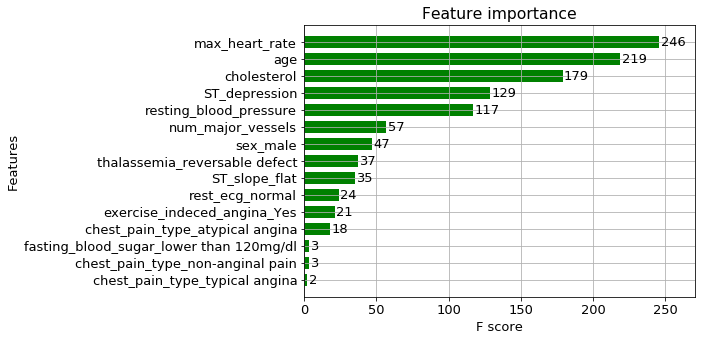

In [22]:
print("Test set AUC:", roc_auc_score(y_test, xgb_cv_clf.predict_proba(X_test)[:,1])) 
print("Test set accuracy:", xgb_cv_clf.score(X_test, y_test))

ax = xgb.plot_importance(xgb_cv_clf, height=0.7, xlabel='F score', 
                         importance_type='weight', 
                         max_num_features=20, grid=True, show_values=True,color='green')
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['font.size'] = 13
plt.show()